# Лабораторная работа №3

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/lab3.csv')

df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df

,OrderId,OrderDate,OrderSum,ClientId,ClientSex,ClientAge
0,1000000,2020-05-28,23217.0,0,female,53
1,1000001,2020-04-18,25296.0,0,female,53
2,1000002,2019-08-19,23500.0,0,female,53
3,1000003,2019-06-02,23819.0,0,female,53
4,1000004,2020-05-18,23161.0,0,female,53
...,...,...,...,...,...,...
129991,1999170,2020-04-15,22112.0,999,female,37
129992,1999171,2019-09-12,25218.0,999,female,37
129993,1999172,2020-09-10,21742.0,999,female,37
129994,1999173,2020-08-10,24904.0,999,female,37


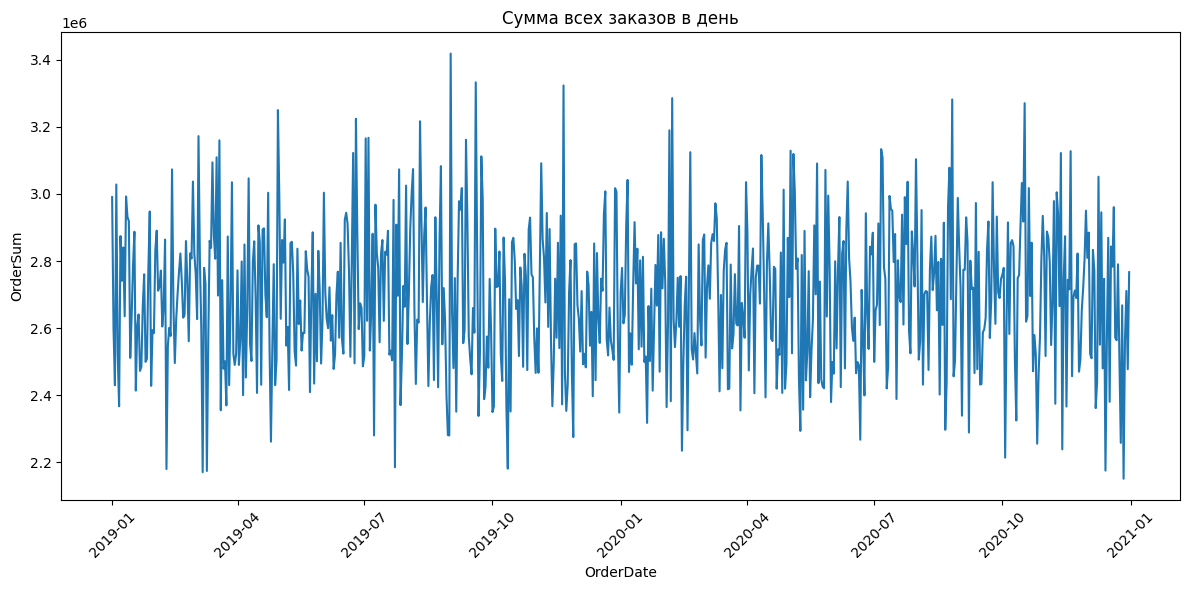

In [10]:
# 2. Построить линейный график зависимости суммы всех заказов в день от даты
daily_orders = df.groupby('OrderDate')['OrderSum'].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(data=daily_orders, x='OrderDate', y='OrderSum')

plt.xticks(rotation=45)

plt.title('Сумма всех заказов в день')

plt.tight_layout()
plt.show()


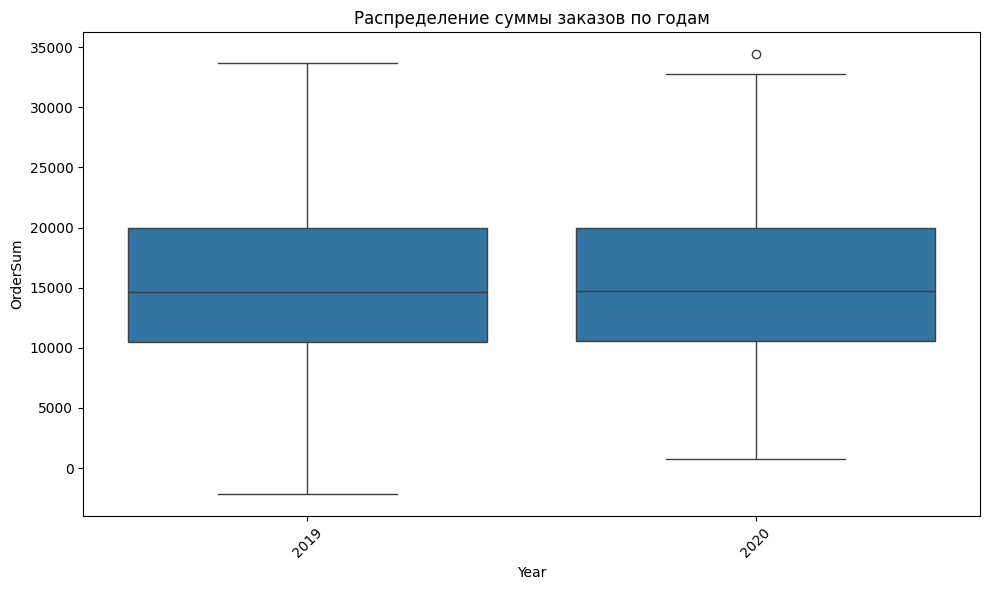

In [14]:
# 3. Построить ящичковую диаграмму по распределению суммы заказа в зависимости от года заказа
df['Year'] = df['OrderDate'].dt.year

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Year', y='OrderSum')

plt.title('Распределение суммы заказов по годам')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

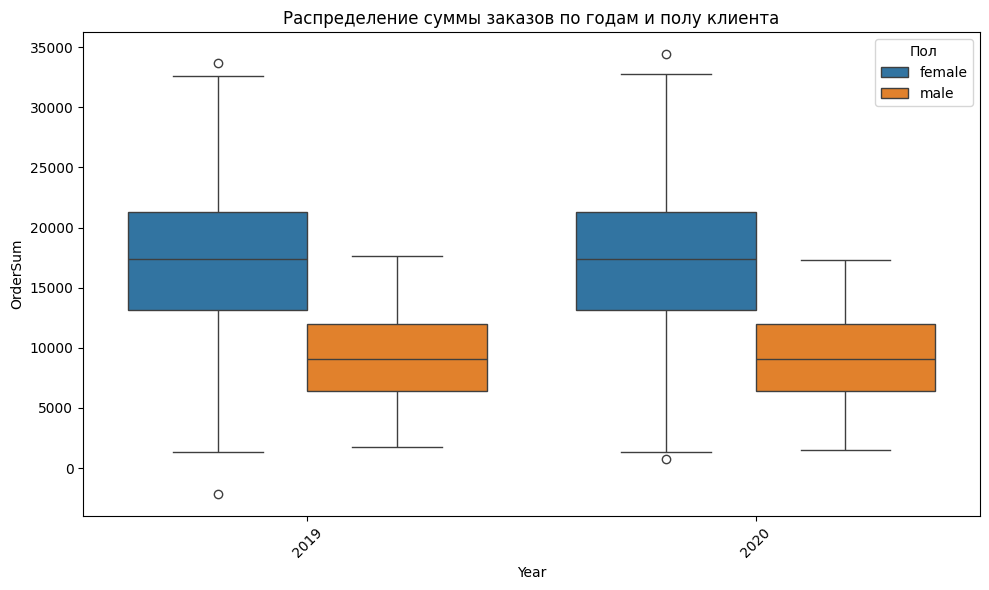

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Year', y='OrderSum', hue='ClientSex')

plt.title('Распределение суммы заказов по годам и полу клиента')
plt.xticks(rotation=45)
plt.legend(title='Пол')
plt.tight_layout()
plt.show()

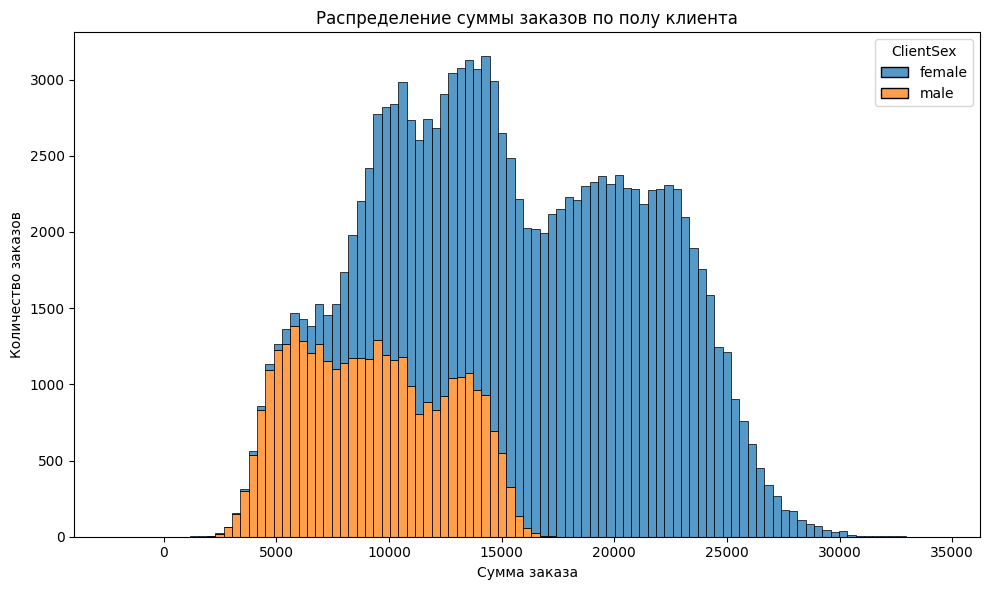

In [17]:
# 4. Построить гистограмму распределения суммы заказа в зависимости от пола клиента

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='OrderSum', hue='ClientSex', multiple='stack')

plt.title('Распределение суммы заказов по полу клиента')
plt.xlabel('Сумма заказа')
plt.ylabel('Количество заказов')
plt.tight_layout()
plt.show()


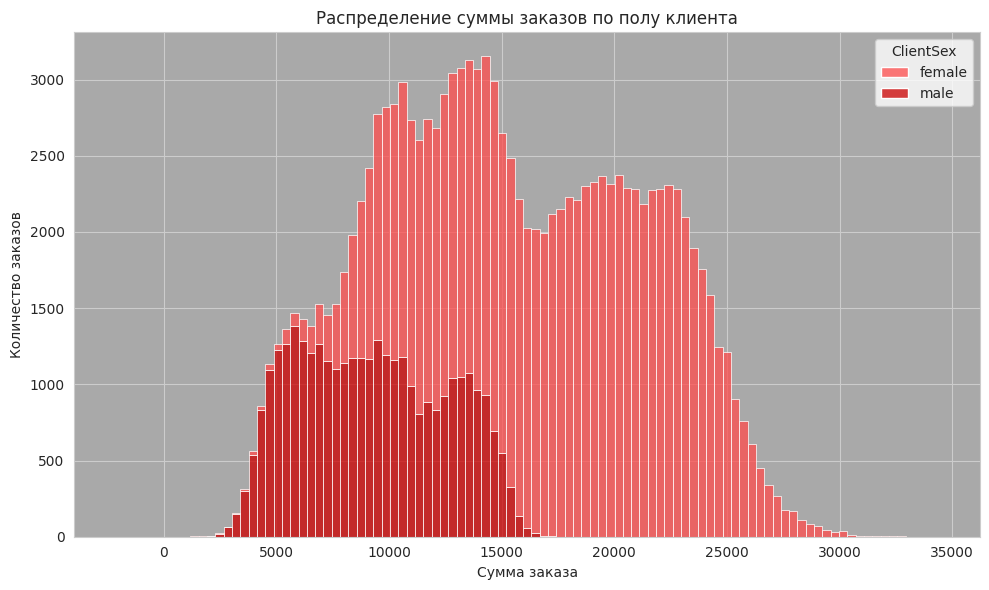

In [50]:
# 4.1. Изменить цвет гистограммы на ярко-красный, добавить темно-серую заливку области построения графика
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='OrderSum', hue='ClientSex', multiple='stack', palette=['#FF4D4D', '#CC0000'])

plt.gca().set_facecolor('darkgrey')

plt.title('Распределение суммы заказов по полу клиента')
plt.xlabel('Сумма заказа')
plt.ylabel('Количество заказов')
plt.tight_layout()
plt.show()

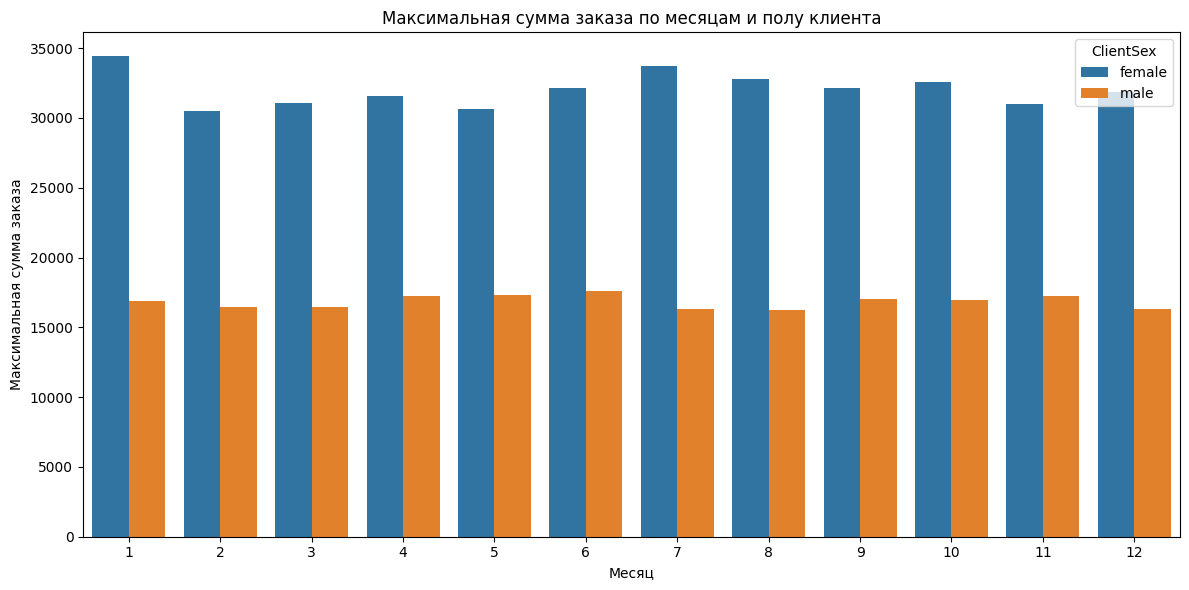

In [26]:
# 5. Построить столбчатую диаграмму зависимости максимальной суммы заказа от даты (месяц, без года)
df['Month'] = df['OrderDate'].dt.month

monthly_max = df.groupby(['Month', 'ClientSex'])['OrderSum'].max().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_max, x='Month', y='OrderSum', hue='ClientSex')

plt.title('Максимальная сумма заказа по месяцам и полу клиента')
plt.xlabel('Месяц')
plt.ylabel('Максимальная сумма заказа')
plt.tight_layout()
plt.show()


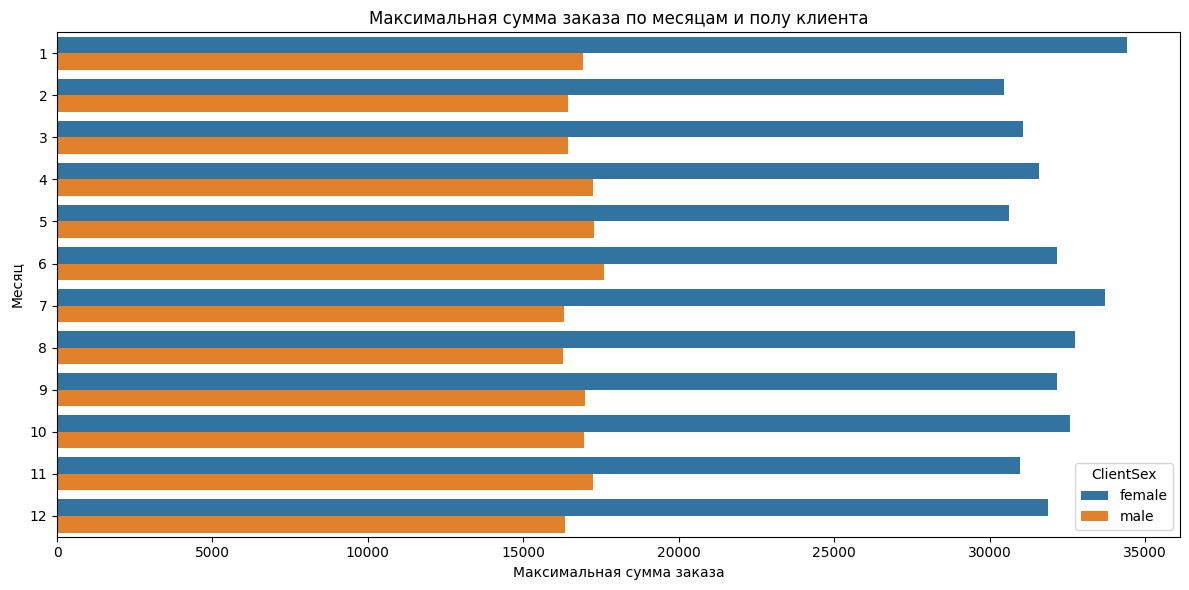

In [29]:
# 5.1. Изменить ориентацию диаграммы на горизонтальную столбчатую
# 5.2. Добавить группировку столбцов по полу
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_max, x='OrderSum', y='Month', hue='ClientSex', orient='h')

plt.title('Максимальная сумма заказа по месяцам и полу клиента')
plt.xlabel('Максимальная сумма заказа')
plt.ylabel('Месяц')
plt.tight_layout()
plt.show()

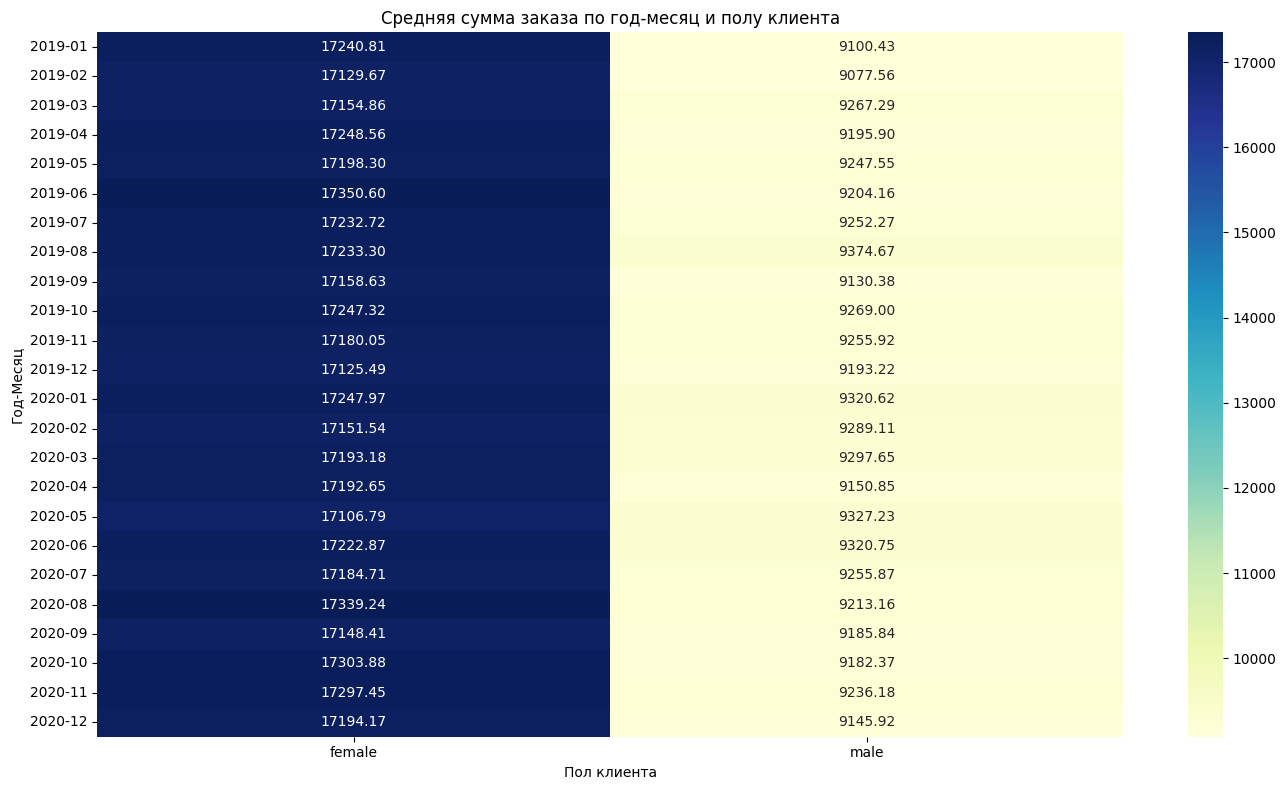

In [30]:
# 6. Построить тепловую карту – средняя сумма заказа по дате (год-месяц) и полу клиента

df['YearMonth '] = df['OrderDate'].dt.to_period('M').astype(str)

heat_data = df.groupby(['YearMonth', 'ClientSex'])['OrderSum'].mean().unstack()

plt.figure(figsize=(14, 8))
sns.heatmap(heat_data, annot=True, fmt=".2f", cmap='YlGnBu')

plt.title('Средняя сумма заказа по год-месяц и полу клиента')
plt.xlabel('Пол клиента')
plt.ylabel('Год-Месяц')
plt.tight_layout()
plt.show()

<ipython-input-35-c9888bbea968>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='ClientSex', y='OrderSum', jitter=True, palette='Set2')


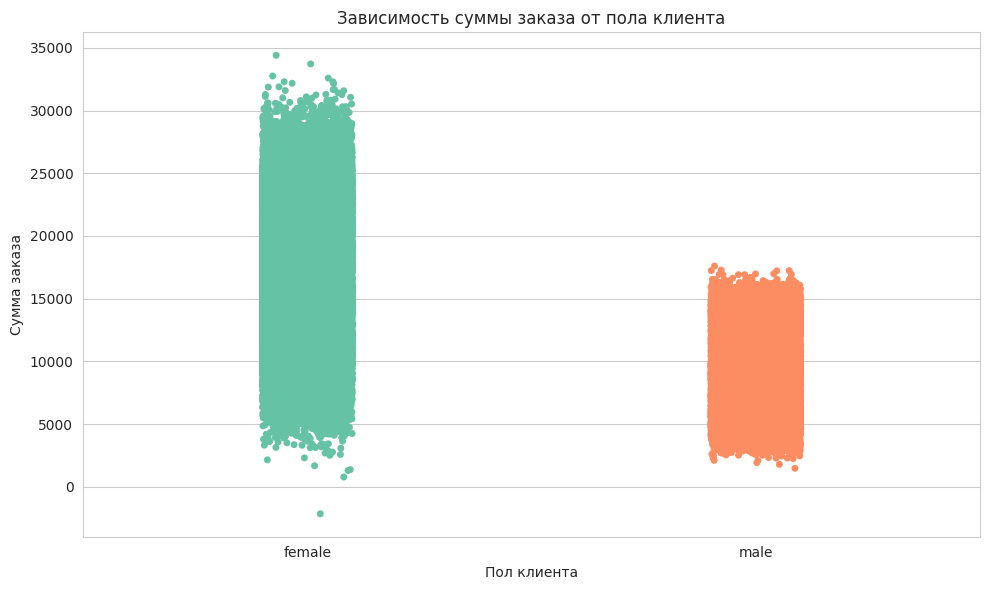

In [35]:
# 7. Построить категориальную диаграмму рассеяния зависимости суммы заказа от пола
# 7.1. Изменить стиль графика
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='ClientSex', y='OrderSum', jitter=True, palette='Set2')

plt.title('Зависимость суммы заказа от пола клиента')
plt.xlabel('Пол клиента')
plt.ylabel('Сумма заказа')
plt.tight_layout()
plt.show()

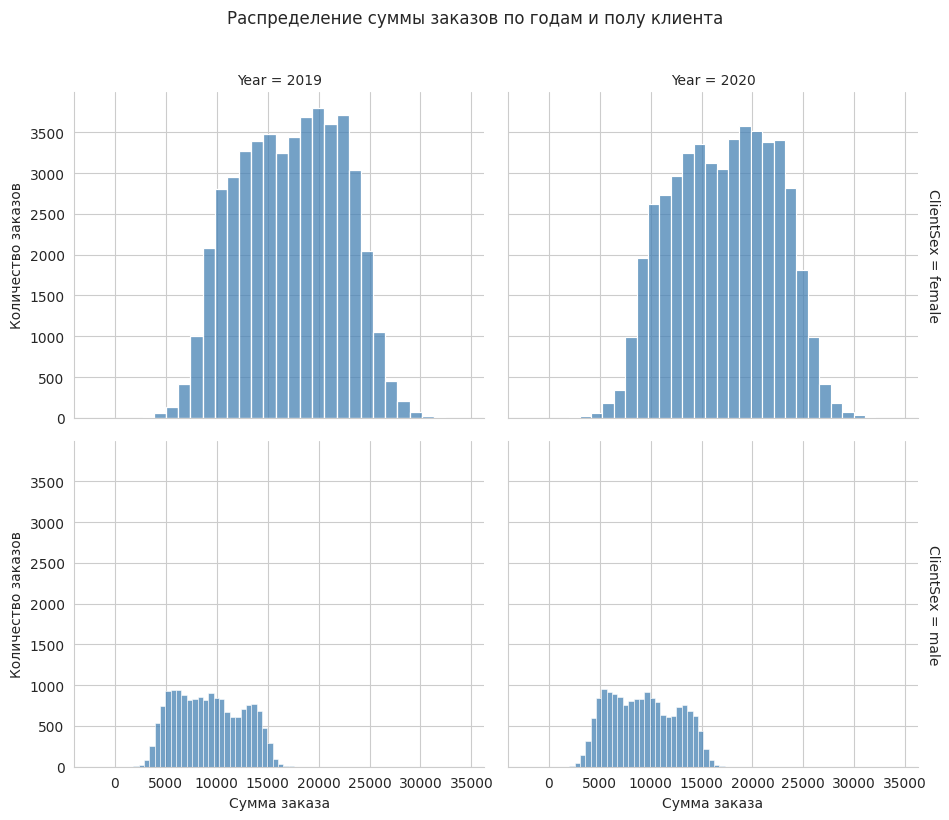

In [36]:
# 8. Построить фасетчатую диаграмму с гистограммами распределения суммы заказа в зависимости от года заказа (столбцы) и пола клиента (строки)

g = sns.FacetGrid(df, row='ClientSex', col='Year', margin_titles=True, height=4, aspect=1.2)
g.map(sns.histplot, 'OrderSum', bins=30, color='steelblue')

g.fig.suptitle('Распределение суммы заказов по годам и полу клиента', y=1.02)
g.set_axis_labels('Сумма заказа', 'Количество заказов')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

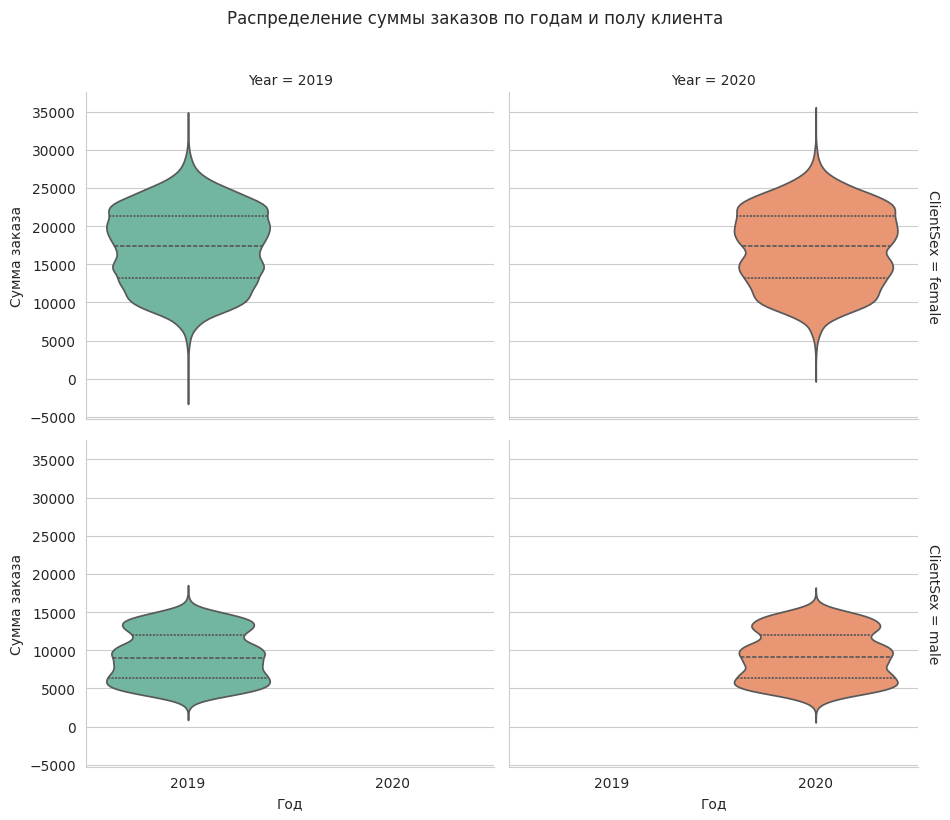

In [38]:
# 8.1. Заменить гистограммы на скрипичные графики
g = sns.FacetGrid(df, row='ClientSex', col='Year', margin_titles=True, height=4, aspect=1.2)
g.map(sns.violinplot, 'Year', 'OrderSum', order=sorted(df['Year'].unique()), inner='quartile', palette='Set2')

g.fig.suptitle('Распределение суммы заказов по годам и полу клиента', y=1.02)
g.set_axis_labels('Год', 'Сумма заказа')
plt.tight_layout()
plt.show()

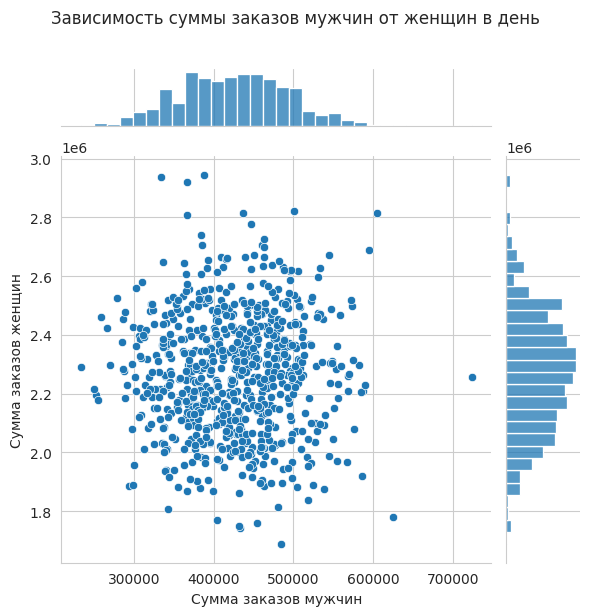

In [41]:
# 9. Построить совместную диаграмму зависимости суммы заказа мужчин от женщин в день с гистограммами

men_orders = df[df['ClientSex'] == 'male'].groupby('OrderDate')['OrderSum'].sum()
women_orders = df[df['ClientSex'] == 'female'].groupby('OrderDate')['OrderSum'].sum()

joint_df = pd.DataFrame({
    'Men': men_orders,
    'Women': women_orders
}).reset_index()

joint_df = joint_df.dropna()

sns.jointplot(data=joint_df, x='Men', y='Women', kind='scatter', marginal_kws=dict(bins=30, fill=True))

plt.suptitle('Зависимость суммы заказов мужчин от женщин в день', y=1.02)
plt.xlabel('Сумма заказов мужчин')
plt.ylabel('Сумма заказов женщин')
plt.tight_layout()
plt.show()


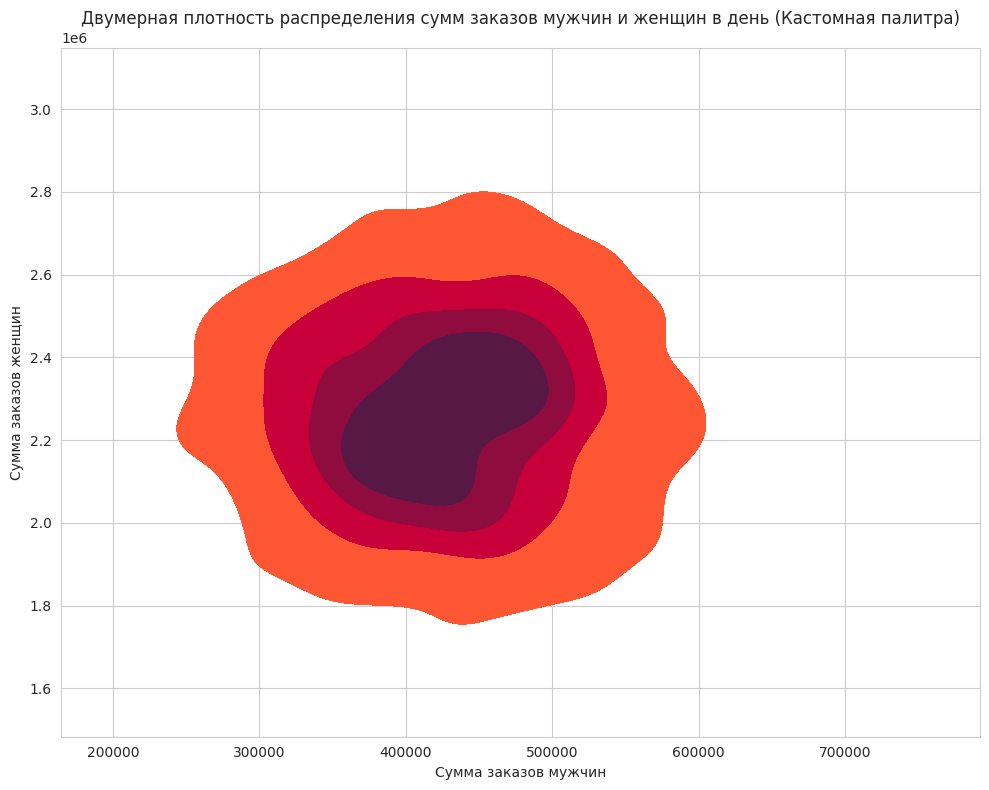

In [47]:
# 10. Построить диаграмму двумерной плотности распределения сумм заказов мужчин и женщин в день
# 10.1. Построить свою палитру цвета и применить ее к графику
from matplotlib.colors import ListedColormap
custom_colors = ["#FF5733", "#C70039", "#900C3F", "#581845"]

custom_cmap = ListedColormap(custom_colors)

plt.figure(figsize=(10, 8))

sns.kdeplot(
    data=joint_df,
    x='Men',
    y='Women',
    cmap=custom_cmap,
    fill=True,
    thresh=0.05
)

plt.title('Двумерная плотность распределения сумм заказов мужчин и женщин в день (Кастомная палитра)')
plt.xlabel('Сумма заказов мужчин')
plt.ylabel('Сумма заказов женщин')
plt.tight_layout()
plt.show()
